# Zomato Price Prediction

**Inorder to predict the future price range of each cuisine, I employed machine learning using the Linear Regression model since I would be predicting price which is continuous and numerical.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
#importing zomato data set
zomato = pd.read_csv('zomato.csv', encoding = "ISO-8859-1")
zomato.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
#used to hold my original datset
originalFeatures = zomato.columns


**Generating heatmap to see the correlation of my numeric features to price.**

<AxesSubplot:>

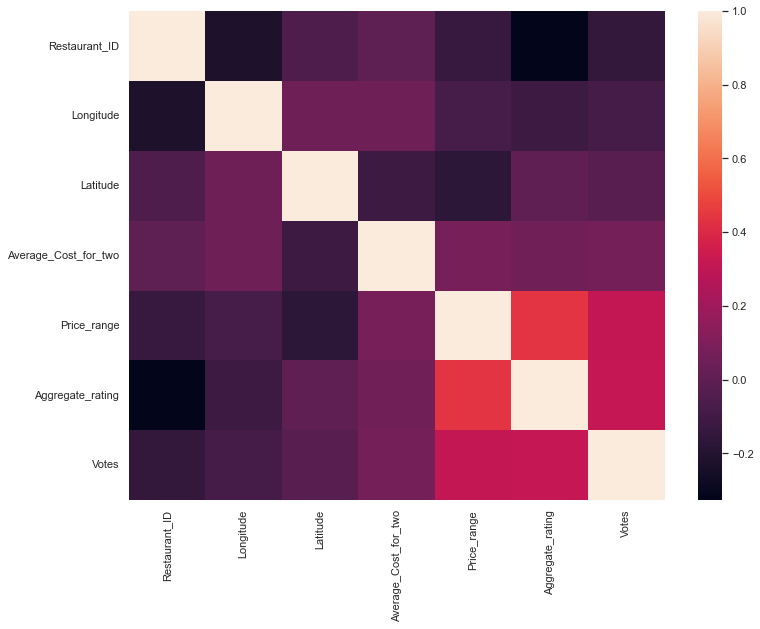

In [ ]:

sns.set(rc = {'figure.figsize':(12,9)})
sns.heatmap(zomato.corr())

In order to determine the features I would be dropping, I thought about what could influence the price of the cuisine from the features. Rating, currency, location, etc could influence the price. I also used the heatmap to see the numerical features that were correlated with price to also guide my choice of features I would be using to predict price. Based on the color density on the heatmap, it can be drawn that restaurant ID, longitude, latitude, and the average cost for two had a strong correlation with price.



In [ ]:
#dropping some data that are not very relevant to my model
while True:
        try:
            drops = ['Restaurant_Name','Restaurant_ID','City','Address','Locality',\
         'Locality_Verbose','Country_Code','Has_Table_booking',\
         'Switch_to_order_menu','Rating_color','Cuisines'] 
            for drop in drops: 
                zomato = zomato.drop(drop, 1)
        except KeyError:
            break

C:\Users\Kendor01\AppData\Local\Temp\ipykernel_9284\4155726583.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zomato = zomato.drop(drop, 1)
C:\Users\Kendor01\AppData\Local\Temp\ipykernel_9284\4155726583.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zomato = zomato.drop(drop, 1)
C:\Users\Kendor01\AppData\Local\Temp\ipykernel_9284\4155726583.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zomato = zomato.drop(drop, 1)
C:\Users\Kendor01\AppData\Local\Temp\ipykernel_9284\4155726583.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  zomato = zomato.drop(drop, 1)
C:\Users\Kendor01\AppData\Local\Temp\ipykernel_9284\4155726583.py:8:

Therefore, I dropped some features which I believe are irrelevant to my prediction. Features like restaurant_name, table booking, switch to order menu, rating color, and cuisines. Checked the original features to see the features remaining.

In [ ]:
#check the colunms we have after dropping some features
print('original to new count', len(originalFeatures), len(zomato.columns)) 
print (zomato.head())



original to new count 21 10
    Longitude   Latitude  Average_Cost_for_two          Currency  \
0  121.027535  14.565443                  1100  Botswana Pula(P)   
1  121.014101  14.553708                  1200  Botswana Pula(P)   
2  121.056831  14.581404                  4000  Botswana Pula(P)   
3  121.056475  14.585318                  1500  Botswana Pula(P)   
4  121.057508  14.584450                  1500  Botswana Pula(P)   

  Has_Online_delivery Is_delivering_now  Price_range  Aggregate_rating  \
0                  No                No            3               4.8   
1                  No                No            3               4.5   
2                  No                No            4               4.4   
3                  No                No            4               4.9   
4                  No                No            4               4.8   

  Rating_text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4  

Imported linear regression model and the label encoder to convert the features with text to numbers since this model works with numbers.I converted the rating text, delivering now, currency, and online delivery to integers.

In [ ]:
#importing linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder #converts text to numbers

In [ ]:
#preprocessing obj data data type to integers to enable it fit my linear regression model  
label = LabelEncoder()

#changing Rating_text to int
label.fit(zomato.Rating_text.drop_duplicates())
zomato.Rating_text = label.transform(zomato.Rating_text)

#changing Is_delivering_now to int
label.fit(zomato.Is_delivering_now.drop_duplicates())
zomato.Is_delivering_now = label.transform(zomato.Is_delivering_now)

#changing Currency to int
label.fit(zomato.Currency.drop_duplicates())
zomato.Currency = label.transform(zomato.Currency)

#changing Has_Online_delivery.drop to int
label.fit(zomato.Has_Online_delivery.drop_duplicates())
zomato.Has_Online_delivery = label.transform(zomato.Has_Online_delivery)

In [ ]:
zomato.head()

,Longitude,Latitude,Average_Cost_for_two,Currency,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_text,Votes
0,121.027535,14.565443,1100,0,0,0,3,4.8,1,314
1,121.014101,14.553708,1200,0,0,0,3,4.5,1,591
2,121.056831,14.581404,4000,0,0,0,4,4.4,5,270
3,121.056475,14.585318,1500,0,0,0,4,4.9,1,365
4,121.057508,14.584450,1500,0,0,0,4,4.8,1,229


<AxesSubplot:>

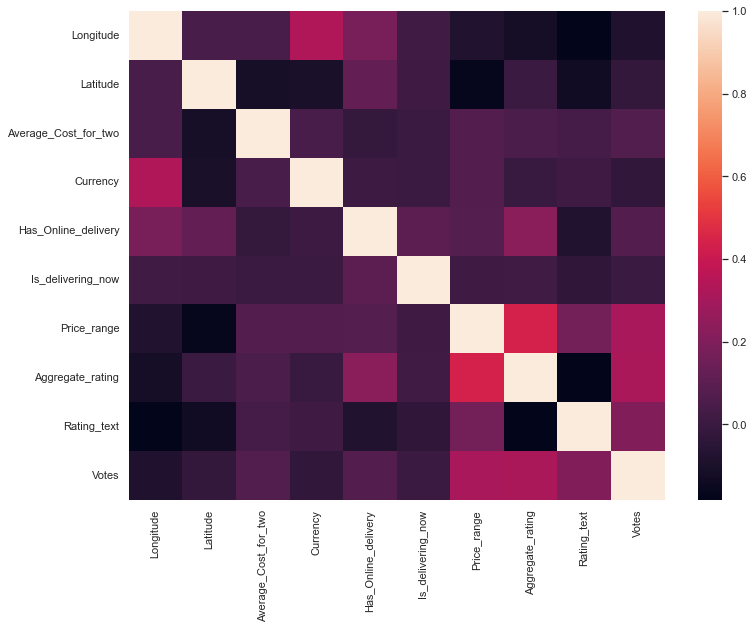

In [ ]:
#generating heatmap
sns.set(rc = {'figure.figsize':(12,9)})
sns.heatmap(zomato.corr())

The heatmap shows how each features are correlated with price based on colour. 

Grouped and trained features. I grouped all features for predicting price into the X variable and put price in a variable called y. I Trained and tested the data and also fitted data to the linear regression model.

In [ ]:
#selecting and grouping columns for X and y
X = zomato.iloc[:, :-3].values
y= zomato.iloc[:, 3].values
zomato.head()

,Longitude,Latitude,Average_Cost_for_two,Currency,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_text,Votes
0,121.027535,14.565443,1100,0,0,0,3,4.8,1,314
1,121.014101,14.553708,1200,0,0,0,3,4.5,1,591
2,121.056831,14.581404,4000,0,0,0,4,4.4,5,270
3,121.056475,14.585318,1500,0,0,0,4,4.9,1,365
4,121.057508,14.584450,1500,0,0,0,4,4.8,1,229


In [ ]:
#training and testing my data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Predicted the price range and compared it with the original price range.

In [ ]:
#predicting price range
y_pred =regressor.predict(X_test)
y_pred

array([4., 4., 4., ..., 4., 4., 4.])

In [ ]:
pred = pd.DataFrame(X_test)
pred['actual_price_range'] = y_test
pred['pred_price'] = y_pred
pred

Checked how accurate the model is in predicting price and plotted the linear regression line to properly see this. The r2_score gave an accurate score of 1.0 and the graph showed the model was perfect in predicting price.

In [ ]:
#How accurate is my prediction
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

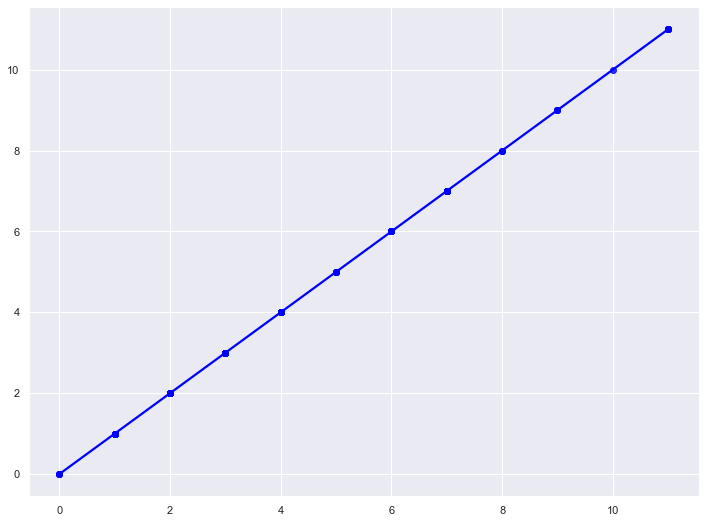

In [ ]:

sns.regplot(x = y_test, y= y_pred, ci = None, color = 'blue');